## Sim Demo

### Imports

In [32]:
%load_ext autoreload
%autoreload 2

  gene2vec_df = pd.read_csv(self.gene2vec_path, sep='\s+', header=None, index_col=0)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
from env.imports import *

In [34]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run)
importlib.reload(models.train_val)
importlib.reload(data.data_utils)
importlib.reload(data.data_load)


<module 'data.data_load' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/data/data_load.py'>

#### Check job specs

In [35]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 4.8%
RAM Usage: 6.0%
Available RAM: 1.4T
Total RAM: 1.5T
52.4G


In [36]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


0
Available GPUs: 1
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.07 GB


In [37]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  3% |


In [38]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

## Simulation tests <a id="sims"></a>

In [ ]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='UKBB',
              parcellation='S456',
              hemisphere='both',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='250_var_genes',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 2),
              track_wandb=True,
              skip_cv=True,
              model_type='dynamic_mlp',
              use_gpu=True,
              null_model='none',
              use_folds=[0]
)

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()

Number of components for 95% variance PCA: 5
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 250)
X_pca shape: (455, 5)
X_pca_full shape: (455, 250)
X_cell_types_Jorstad shape: (455, 24)
X_cell_types_LakeDFC shape: (455, 18)
X_cell_types_LakeVIS shape: (455, 18)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
connectome target FC
Y shape (455, 455)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


  return LooseVersion(v) >= LooseVersion(check)

ERROR: Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: asratzan (alexander-ratzan-new-york-university). Use `wandb login --relogin` to force relogin
wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: g4vjr3pn
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/g4vjr3pn
Initialized sweep with ID: g4vjr3pn
2
3
4
BEST CONFIG {'input_dim': 500, 'expression_bins': 5, 'genevec_type': 'coexpression', 'd_model': 128, 'nhead': 2, 'num_layers': 2, 'deep_hidden_dims': [512, 256, 128], 'cls_init': 'random', 'pooling_mode': 'attention', 'use_alibi': False, 'transformer_dropout': 0.2, 'dropout_rate': 0.2, 'learning_rate': 4e-05, 'weight_decay': 0.0001, 'batch_size': 1024, 'epochs': 150, 'aug_prob': 0.0, 'aug_style': 'linear_decay', 'lambda_sym': 0.0, 'num_workers': 2, 'prefetch_factor': 4, 'cosine_lr': False}
Loaded Gene2Vec embeddings: 237 genes with 200-dimensional embeddings
Gene overlap: 237/250 valid genes have Gene2Vec embeddings


  warnings.warn(



Number of learnable parameters in CrossAttentionGeneVec model: 528648
Number of genes after Gene2Vec intersection: 237
Expression bins: 5
CLS token initialization: random


  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



  from IPython.core.display import HTML, display  # type: ignore



Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.00 GB
Best val loss so far at epoch 1: 0.0478
Best val loss so far at epoch 2: 0.0394
Best val loss so far at epoch 3: 0.0386
Best val loss so far at epoch 4: 0.0350
Best val loss so far at epoch 5: 0.0341
Epoch 5/150, Train Loss: 0.1085, Val Loss: 0.0341, Time: 1.54s
Best val loss so far at epoch 6: 0.0339
Best val loss so far at epoch 7: 0.0334
Best val loss so far at epoch 8: 0.0331
Best val loss so far at epoch 9: 0.0321
Epoch 10/150, Train Loss: 0.0774, Val Loss: 0.0328, Time: 1.53s
Best val loss so far at epoch 11: 0.0320
Best val loss so far at epoch 13: 0.0318
Best val loss so far at epoch 14: 0.0316
Epoch 15/150, Train Loss: 0.0586, Val Loss: 0.0317, Time: 1.56s
Best val loss so far at epoch 17: 0.0316
Best val loss so far at epoch 18: 0.0314
Best val loss so far at epoch 19: 0.0313
Epoch 20/150, Train Loss: 0.0465, Val Loss: 0.0313, Time: 1.55s
Best val loss so far at epoch 22: 0.0312
Best val loss so far a

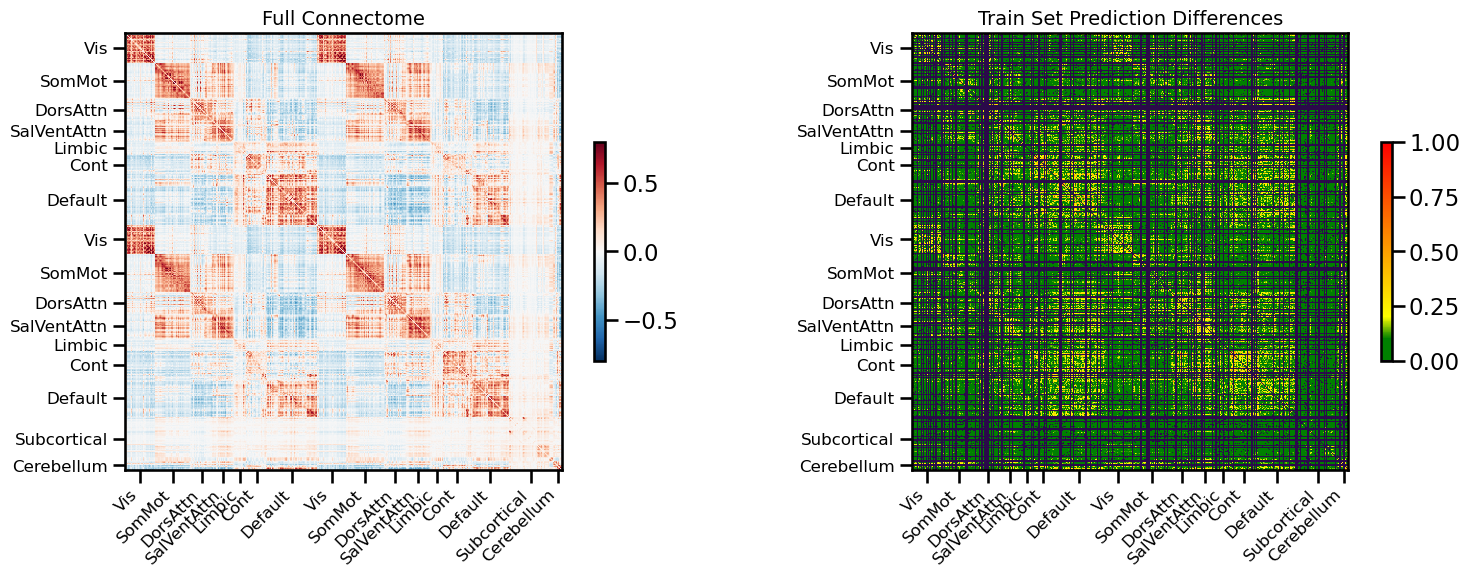

<Figure size 640x480 with 0 Axes>

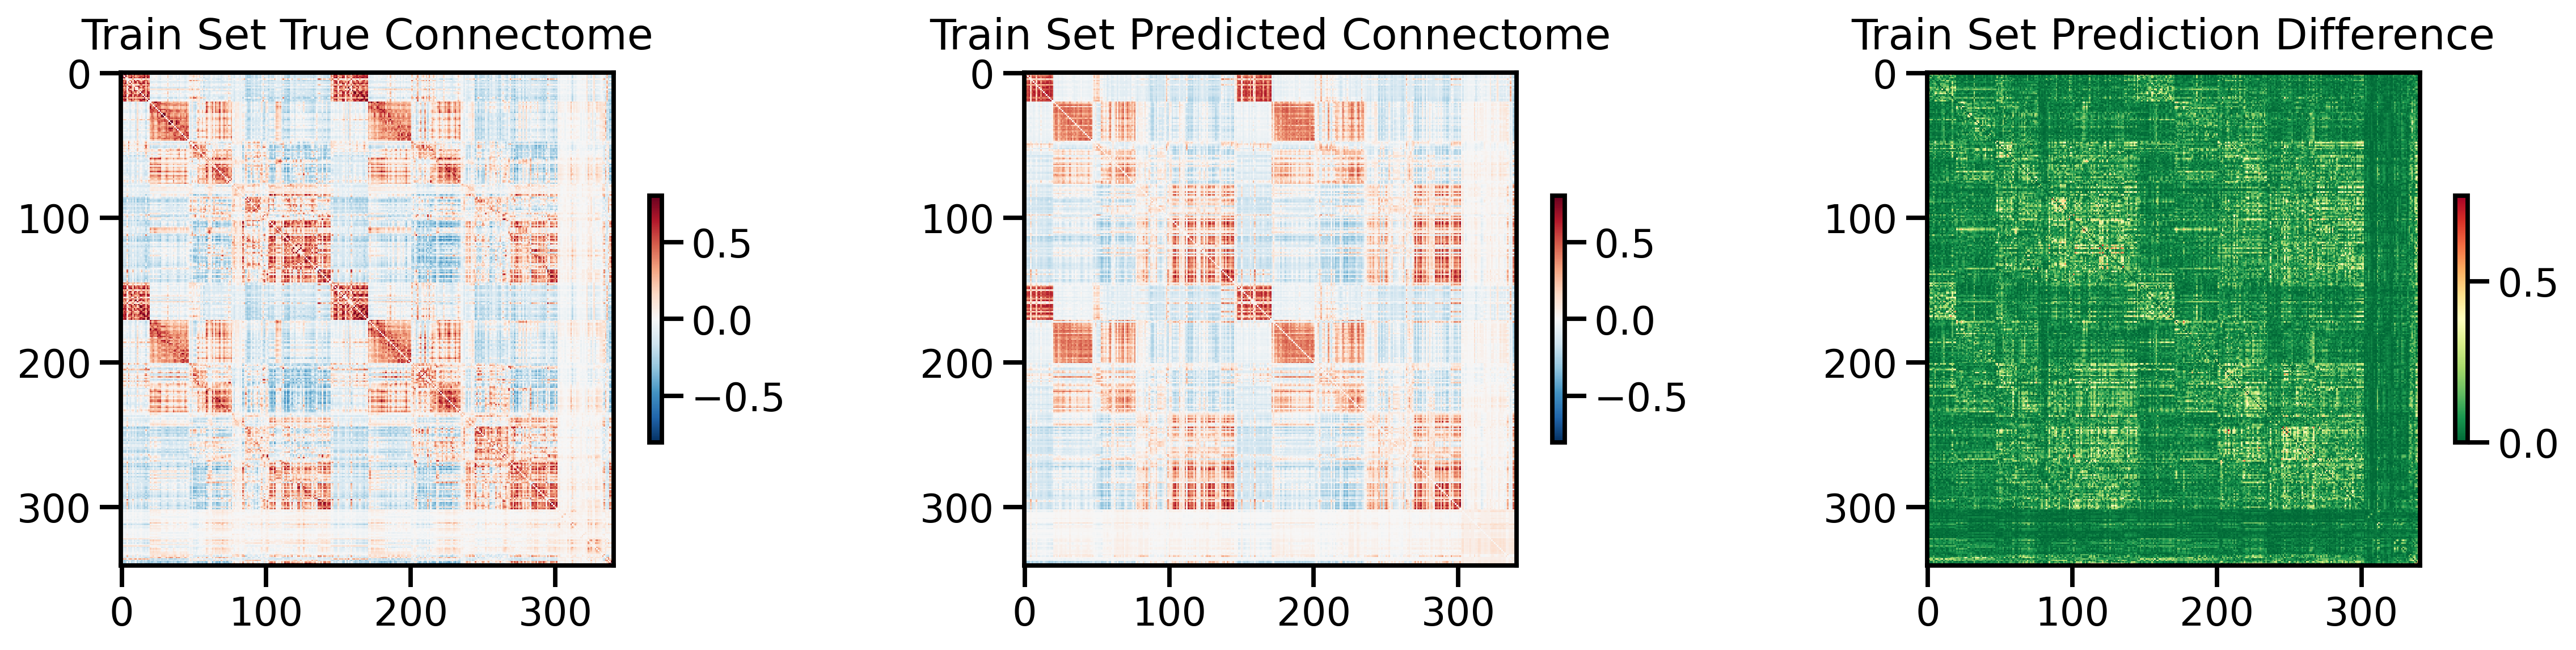

<Figure size 640x480 with 0 Axes>

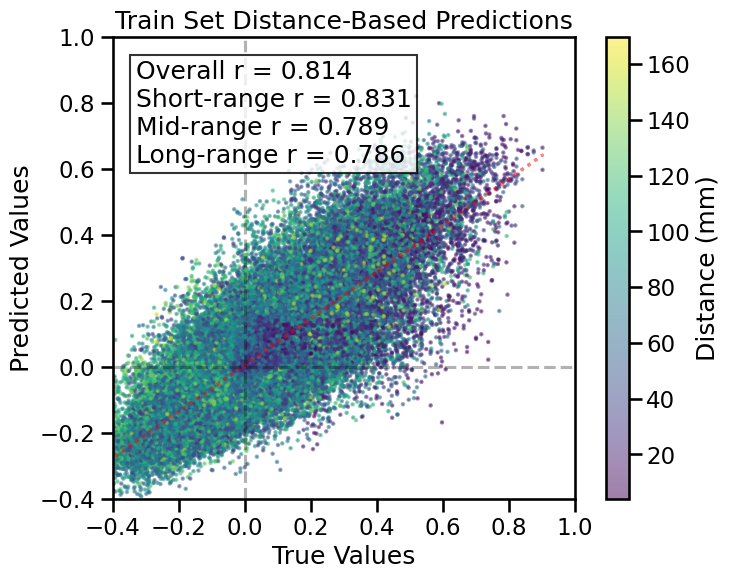

Running test evaluation...

=== TEST EVALUATION ===
Evaluating 114 regions, 12882 connections


<Figure size 640x480 with 0 Axes>

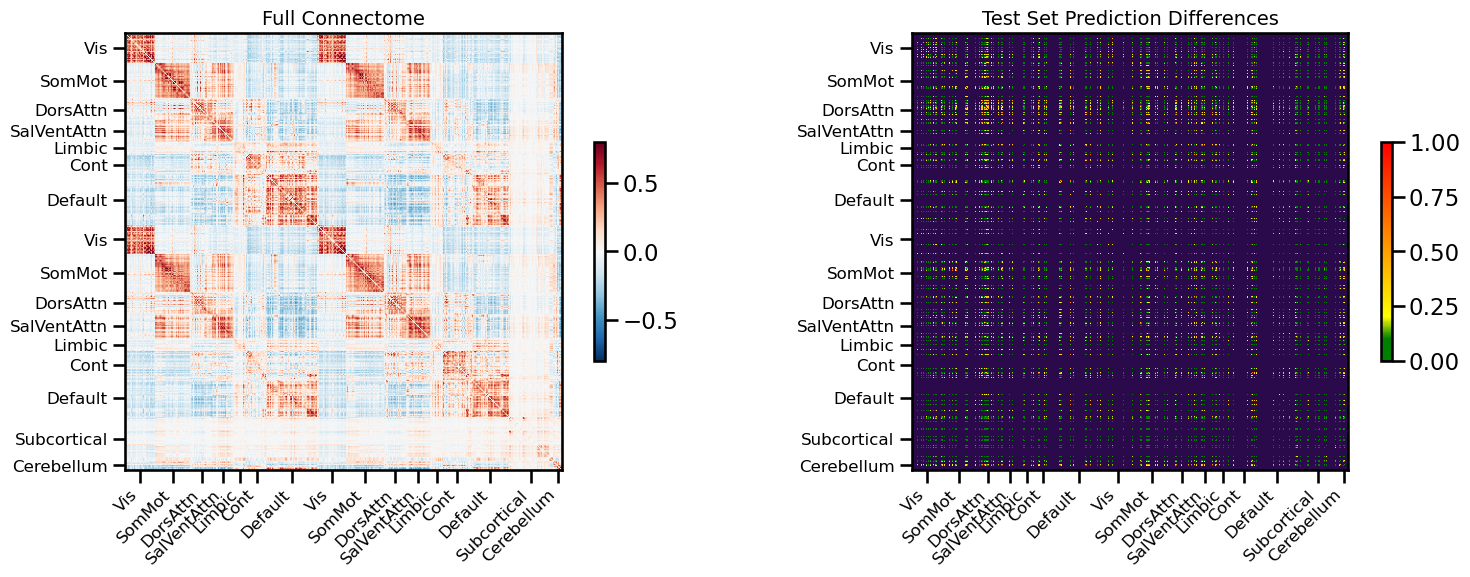

<Figure size 640x480 with 0 Axes>

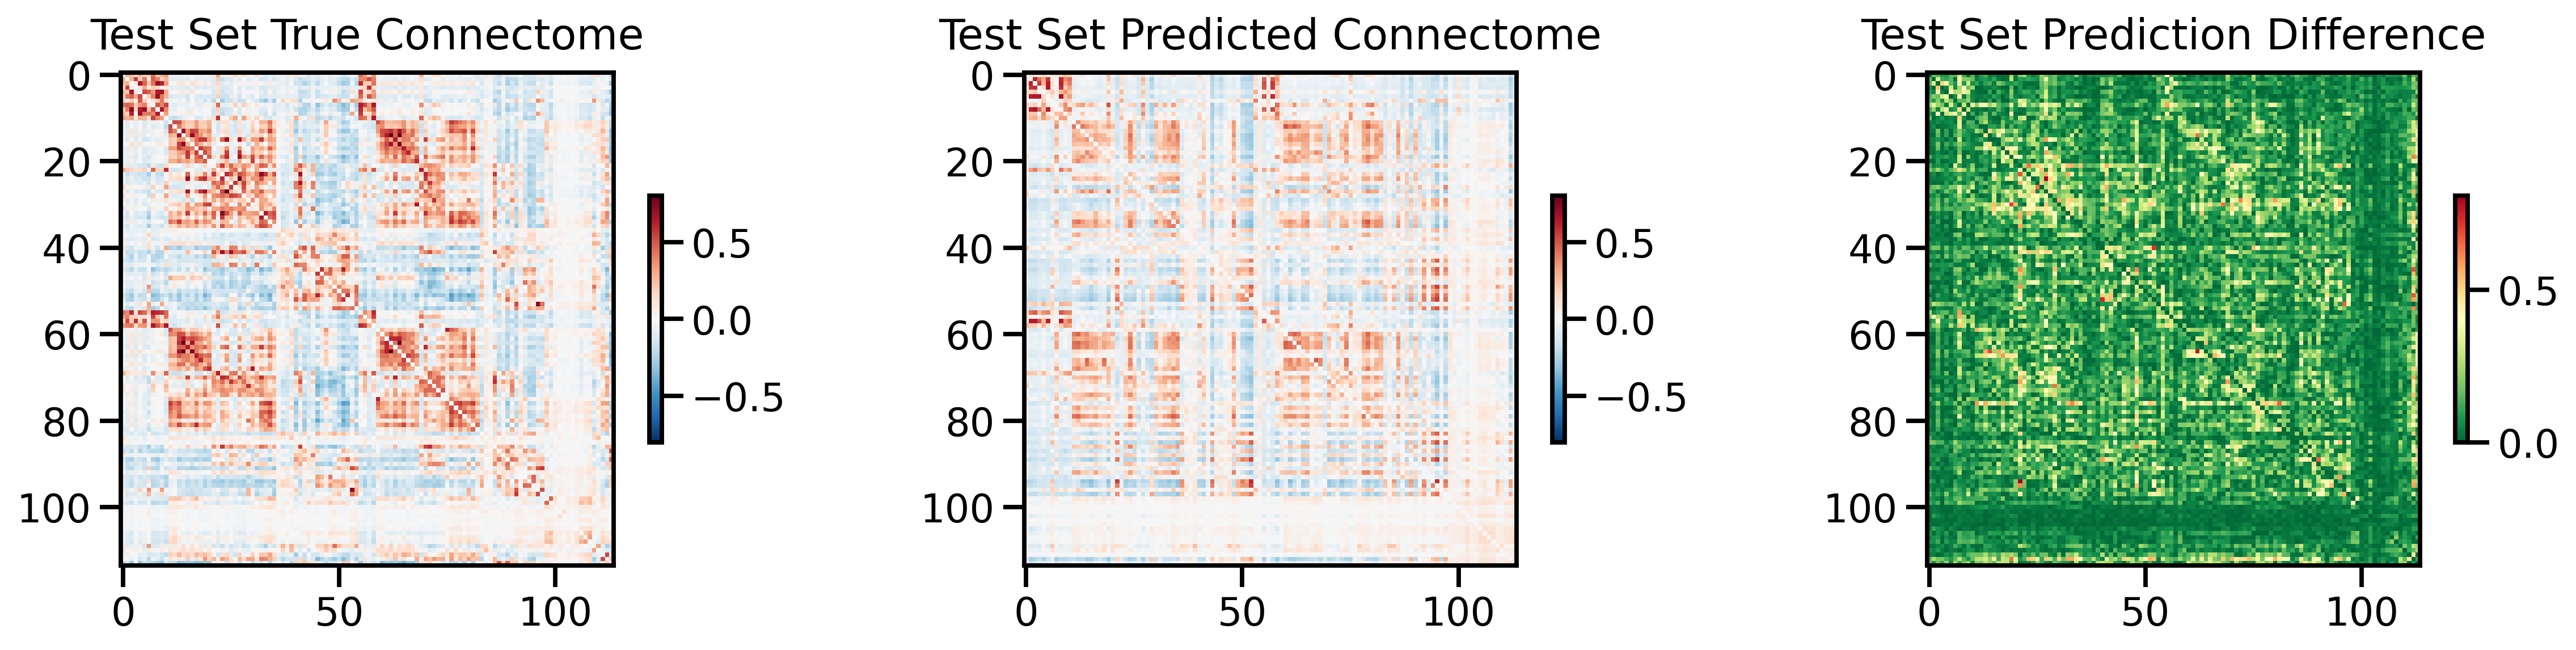

<Figure size 640x480 with 0 Axes>

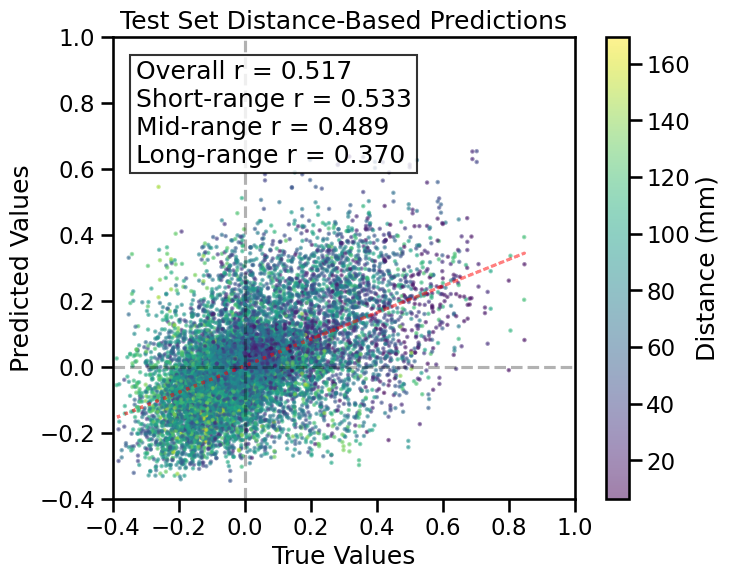

TRAIN METRICS
GLOBAL: mse=0.011512, mae=0.076781, r2=0.6602, pearson_r=0.8142, spearman_r=0.7831, geodesic_distance=24.7949
DISTANCE-BASED: short=0.8310, mid=0.7892, long=0.7862
HEMISPHERIC: left=0.8114, right=0.8139, inter=0.8235
CONNECTION STRENGTH: neg=0.2023, weak=0.7123, pos=0.4303
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ------------------------------
  Cont          0.8049    0.8287
  Default       0.7054    0.7869
  SalVentAttn    0.8444    0.8426
  Limbic        0.8106    0.8422
  DorsAttn      0.8243    0.8536
  SomMot        0.8654    0.8550
  Vis           0.8964    0.8634
  Subcortical    0.6519    0.7868
  Cerebellum    0.6294    0.7776

TEST METRICS
GLOBAL: mse=0.026360, mae=0.116705, r2=0.1949, pearson_r=0.5167, spearman_r=0.5055, geodesic_distance=16.2054
DISTANCE-BASED: short=0.5335, mid=0.4886, long=0.3700
HEMISPHERIC: left=0.4516, right=0.5675, inter=0.5364
CONNECTION STRENGTH: neg=-0.0799, weak=0.4384, pos=0.1888
NETWORK CORRELATIONS:
  NETWORK      

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 4.9%
RAM Usage: 5.7%
Available RAM: 1.4T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |
Sim complete
Simulation completed in 283.79 seconds (4.73 minutes)


10562

<Figure size 640x480 with 0 Axes>

In [29]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='UKBB',
              parcellation='S456',
              hemisphere='both',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='250_var_genes',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 2),
              track_wandb=True,
              skip_cv=True,
              model_type='cross_attention_genevec',
              use_gpu=True,
              null_model='none',
              use_folds=[0]
)

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()

  gene2vec_df = pd.read_csv(self.gene2vec_path, sep='\s+', header=None, index_col=0)



Number of components for 95% variance PCA: 5
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 250)
X_pca shape: (455, 5)
X_pca_full shape: (455, 250)
X_cell_types_Jorstad shape: (455, 24)
X_cell_types_LakeDFC shape: (455, 18)
X_cell_types_LakeVIS shape: (455, 18)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
connectome target FC
Y shape (455, 455)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: leukse8q
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/leukse8q
Initialized sweep with ID: leukse8q
2
3
4
BEST CONFIG {'input_dim': 500, 'expression_bins': 5, 'genevec_type': 'coexpression', 'd_model': 128, 'nhead': 2, 'num_layers': 2, 'deep_hidden_dims': [512, 256, 128], 'cls_init': 'random', 'pooling_mode': 'attention', 'use_alibi': False, 'transformer_dropout': 0.2, 'dropout_rate': 0.2, 'learning_rate': 4e-05, 'weight_decay': 0.0001, 'batch_size': 1024, 'epochs': 150, 'aug_prob': 0.0, 'aug_style': 'linear_decay', 'lambda_sym': 0.0, 'num_workers': 2, 'prefetch_factor': 4, 'cosine_lr': False}


  warnings.warn(

  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



Loaded coexpression embeddings: 250 genes with 7380-dimensional embeddings
Using all valid genes for coexpression embeddings
Number of learnable parameters in CrossAttentionGeneVec model: 1447688
Expression bins: 5
CLS token initialization: random


  from IPython.core.display import HTML, display  # type: ignore



Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.11 GB
Best val loss so far at epoch 1: 0.0476
Best val loss so far at epoch 2: 0.0408
Best val loss so far at epoch 3: 0.0364
Best val loss so far at epoch 5: 0.0347
Epoch 5/150, Train Loss: 0.1109, Val Loss: 0.0347, Time: 4.11s
Best val loss so far at epoch 6: 0.0344
Best val loss so far at epoch 7: 0.0335
Best val loss so far at epoch 8: 0.0328
Best val loss so far at epoch 9: 0.0327
Epoch 10/150, Train Loss: 0.0786, Val Loss: 0.0330, Time: 4.10s
Best val loss so far at epoch 12: 0.0322
Best val loss so far at epoch 14: 0.0320
Best val loss so far at epoch 15: 0.0318
Epoch 15/150, Train Loss: 0.0593, Val Loss: 0.0318, Time: 4.14s
Best val loss so far at epoch 17: 0.0316
Best val loss so far at epoch 18: 0.0315
Best val loss so far at epoch 20: 0.0314
Epoch 20/150, Train Loss: 0.0468, Val Loss: 0.0314, Time: 4.13s
Best val loss so far at epoch 23: 0.0313
Best val loss so far at epoch 24: 0.0312
Epoch 25/150, Train L

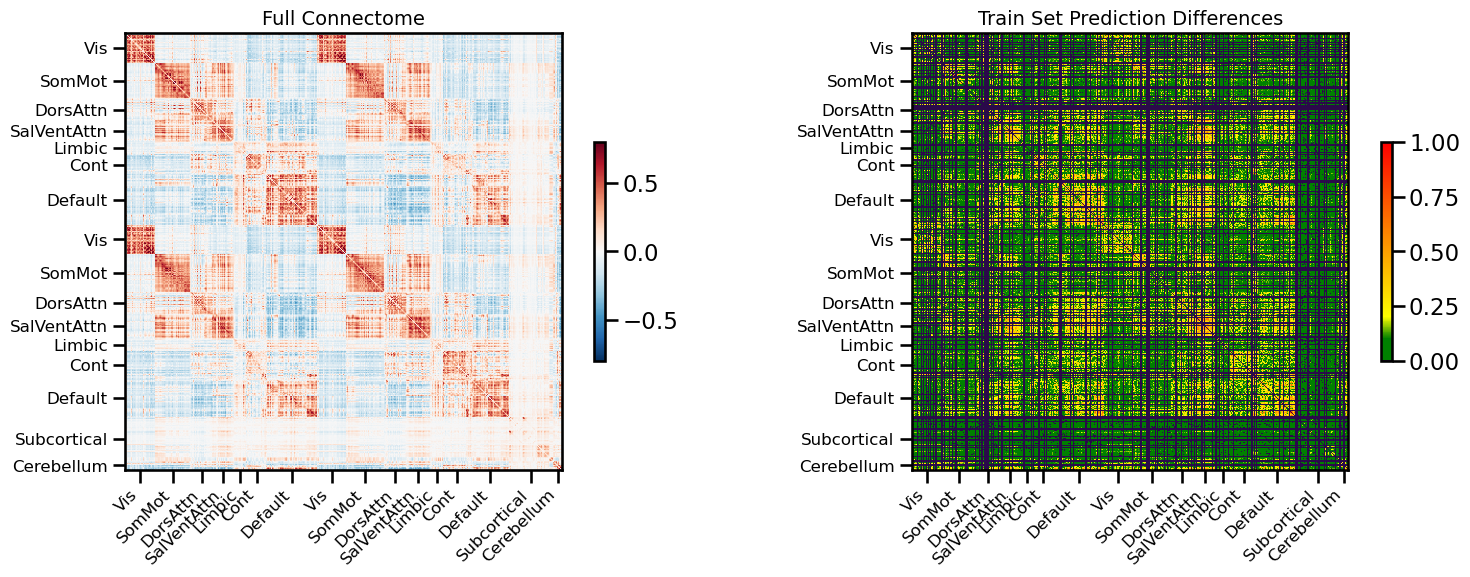

<Figure size 640x480 with 0 Axes>

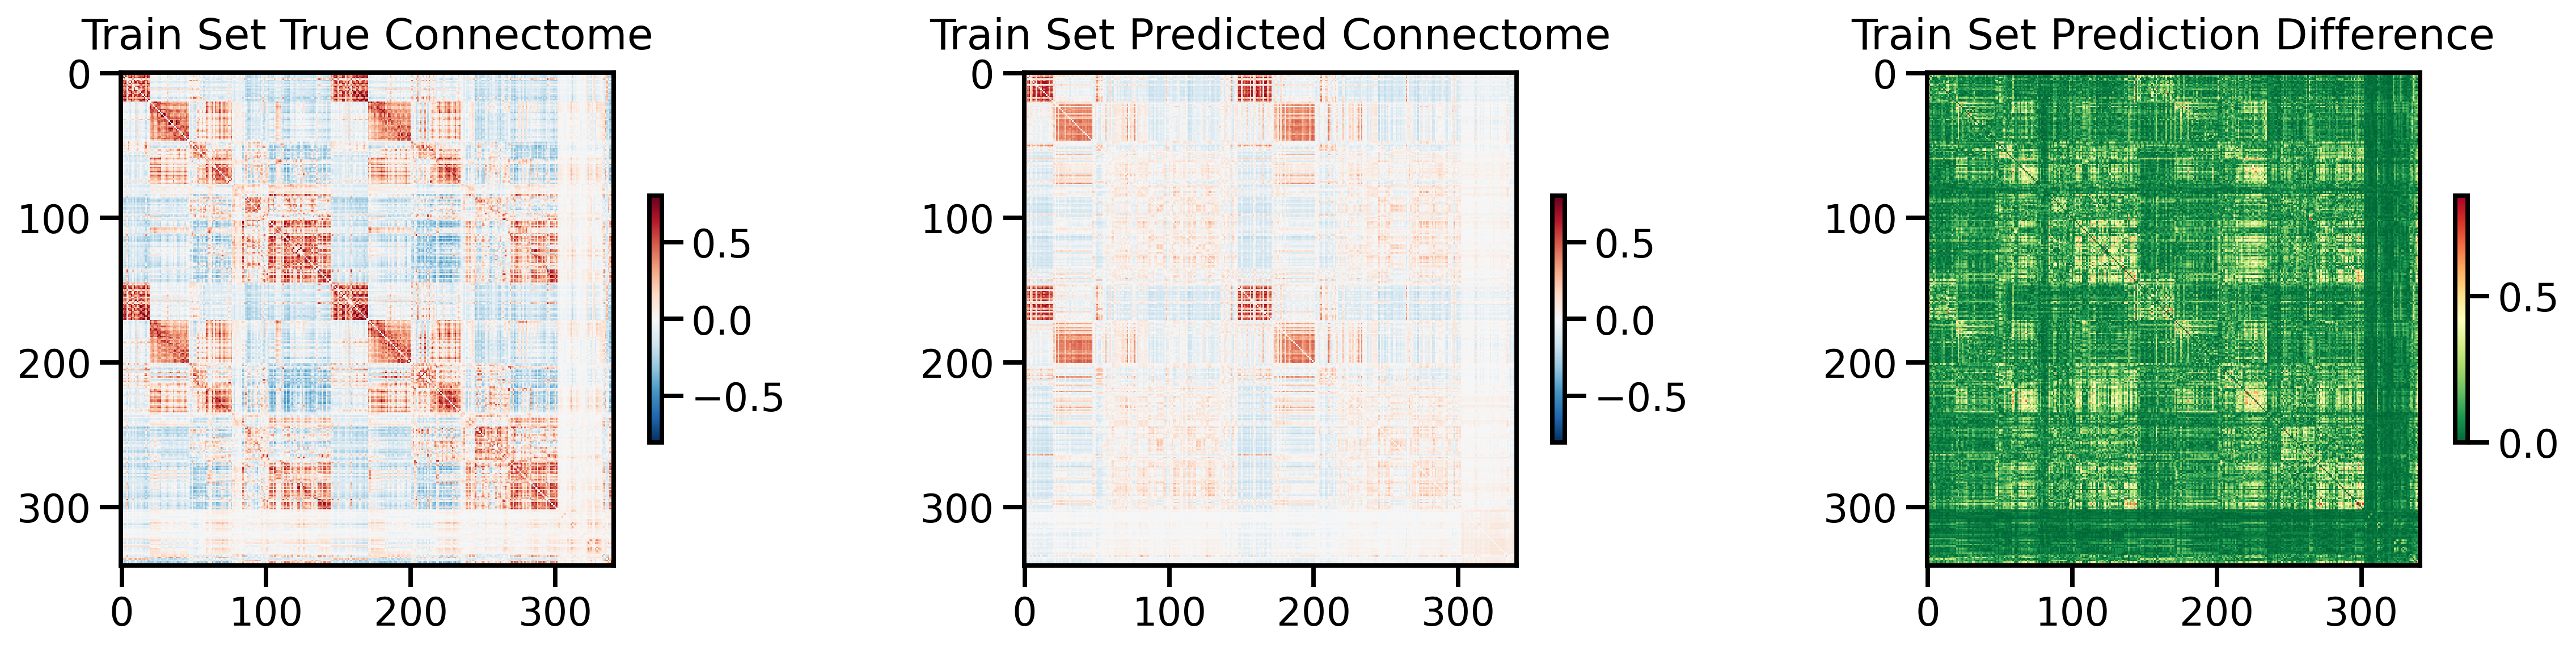

<Figure size 640x480 with 0 Axes>

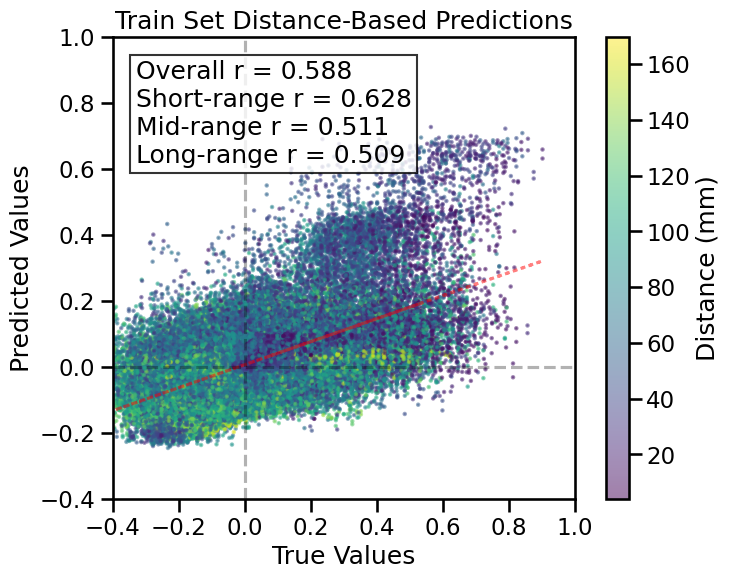

Running test evaluation...

=== TEST EVALUATION ===
Evaluating 114 regions, 12882 connections


<Figure size 640x480 with 0 Axes>

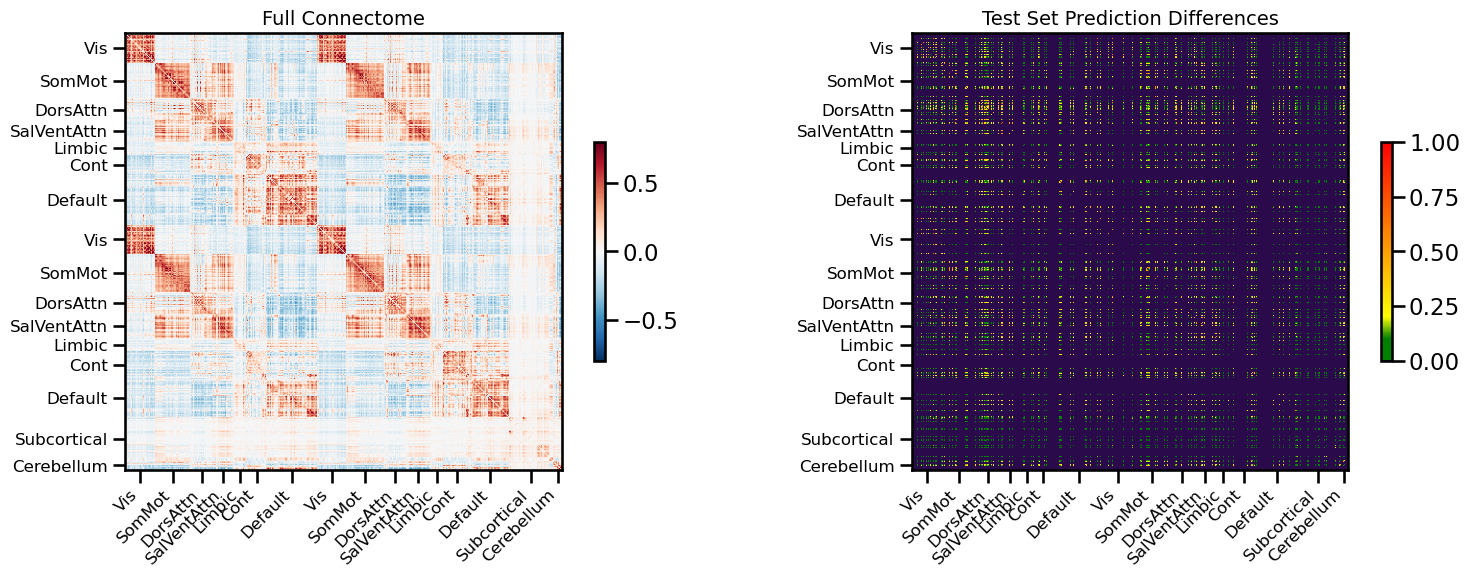

<Figure size 640x480 with 0 Axes>

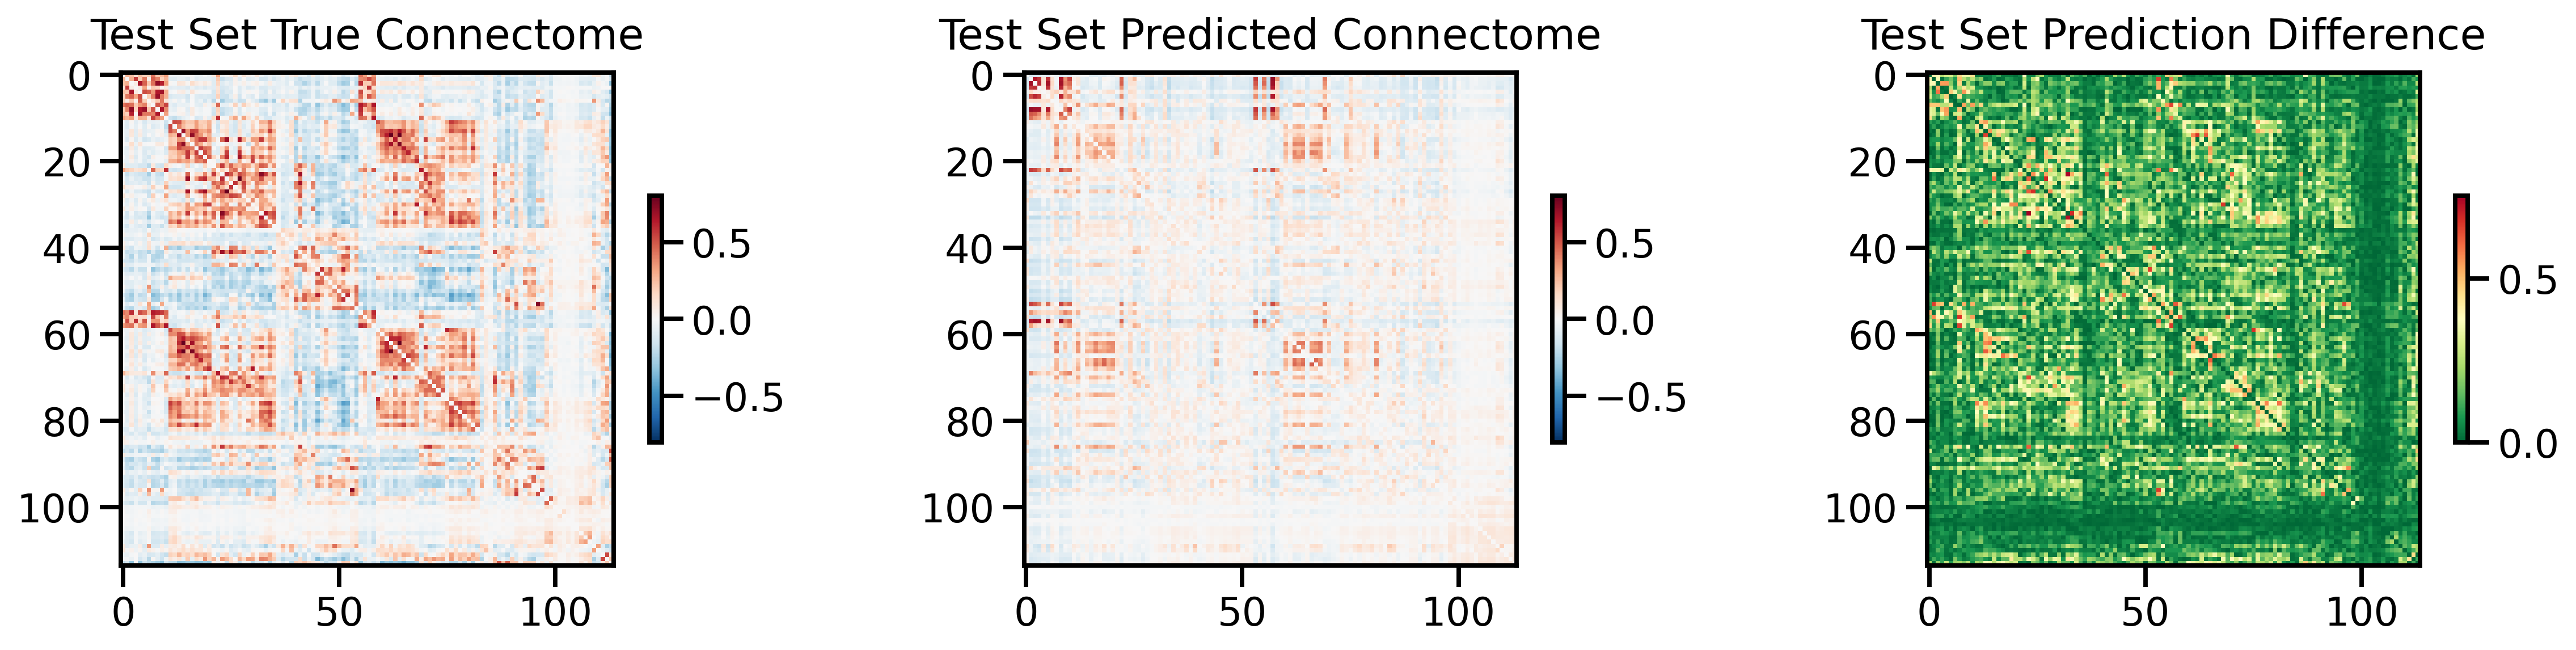

<Figure size 640x480 with 0 Axes>

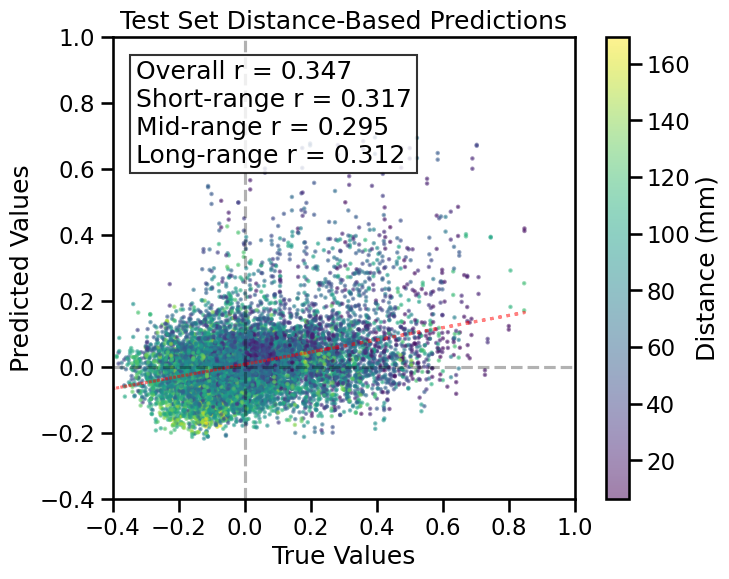

TRAIN METRICS
GLOBAL: mse=0.022193, mae=0.106888, r2=0.3449, pearson_r=0.5877, spearman_r=0.5374, geodesic_distance=31.1773
DISTANCE-BASED: short=0.6281, mid=0.5113, long=0.5087
HEMISPHERIC: left=0.5827, right=0.5961, inter=0.5899
CONNECTION STRENGTH: neg=-0.0510, weak=0.4738, pos=0.3124
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ------------------------------
  Cont          0.7372    0.6861
  Default       0.4077    0.5709
  SalVentAttn    0.7552    0.6913
  Limbic        0.7233    0.7138
  DorsAttn      0.6542    0.6510
  SomMot        0.7068    0.6956
  Vis           0.6315    0.6237
  Subcortical    0.5418    0.5898
  Cerebellum    0.7397    0.6023

TEST METRICS
GLOBAL: mse=0.030045, mae=0.126769, r2=0.0823, pearson_r=0.3472, spearman_r=0.2990, geodesic_distance=20.3100
DISTANCE-BASED: short=0.3172, mid=0.2954, long=0.3115
HEMISPHERIC: left=0.3376, right=0.3604, inter=0.3643
CONNECTION STRENGTH: neg=-0.1651, weak=0.2482, pos=0.2335
NETWORK CORRELATIONS:
  NETWORK     

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 4.2%
RAM Usage: 6.0%
Available RAM: 1.4T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |
Sim complete
Simulation completed in 689.03 seconds (11.48 minutes)


10633

<Figure size 640x480 with 0 Axes>

In [40]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='UKBB',
              parcellation='S456',
              hemisphere='both',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='250_var_genes',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 2),
              track_wandb=True,
              skip_cv=True,
              model_type='cross_attention_genevec',
              use_gpu=True,
              null_model='none',
              use_folds=[0]
)

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()

In [ ]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='UKBB',
              parcellation='S456',
              hemisphere='both',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='richiardi2015',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 2),
              track_wandb=True,
              skip_cv=True,
              model_type='cross_attention_genevec',
              use_gpu=True,
              null_model='none',
              use_folds=[0]
)

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()

Number of components for 95% variance PCA: 16
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 105)
X_pca shape: (455, 16)
X_pca_full shape: (455, 105)
X_cell_types_Jorstad shape: (455, 24)
X_cell_types_LakeDFC shape: (455, 18)
X_cell_types_LakeVIS shape: (455, 18)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
connectome target FC
Y shape (455, 455)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: 4v4pttpp
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/4v4pttpp
Initialized sweep with ID: 4v4pttpp
2
3
4
BEST CONFIG {'input_dim': 210, 'expression_bins': 5, 'genevec_type': 'coexpression', 'd_model': 128, 'nhead': 2, 'num_layers': 2, 'deep_hidden_dims': [512, 256, 128], 'cls_init': 'random', 'pooling_mode': 'attention', 'use_alibi': False, 'transformer_dropout': 0.2, 'dropout_rate': 0.2, 'learning_rate': 4e-05, 'weight_decay': 0.0001, 'batch_size': 1024, 'epochs': 150, 'aug_prob': 0.0, 'aug_style': 'linear_decay', 'lambda_sym': 0.0, 'num_workers': 2, 'prefetch_factor': 4, 'cosine_lr': False}


  warnings.warn(

  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



Loaded coexpression embeddings: 105 genes with 7380-dimensional embeddings
Using all valid genes for coexpression embeddings
Number of learnable parameters in CrossAttentionGeneVec model: 1447688
Expression bins: 5
CLS token initialization: random


  from IPython.core.display import HTML, display  # type: ignore



Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.10 GB
Best val loss so far at epoch 1: 0.0402
Best val loss so far at epoch 2: 0.0361
Best val loss so far at epoch 3: 0.0348
Best val loss so far at epoch 4: 0.0338
Epoch 5/150, Train Loss: 0.1076, Val Loss: 0.0340, Time: 1.72s
Best val loss so far at epoch 6: 0.0335
Best val loss so far at epoch 7: 0.0331
